# Cleanup and Analysis of Suricata Benchmarking Results

## Experiment Definition


According to call on 2019-07-25:

- VNF: Suricata IDS
- parameters:
    - cpu_bw 0.1 - 1.0, step 0.1
    - core pinnig (1 core per container)
    - memory: 1024MB
    - rulset: empty, small, large
    - low sizes (pcaps): smallFlows, bigFlows (tcpreplay -i data -tK --loop 1000)
    - repetitions: 10
    - round time (measurement of one config): 30 seconds
- recorded metrics:
    - suricata_bytes
    - suricata_dropped
    - suricate_drops
    - suricata_packets
    
  


In [1]:
# basics
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import random
random.seed(12121)
np.random.seed(12121)

## Data Cleaning

In [2]:
df = pd.read_csv("vnfbr-003-custom-metrics.csv")

In [3]:
df

Unnamed: 0  test  trial flow_size ruleset  cpu_bw  suricata_bytes  \
0             0     0      0     small     big     0.1             NaN   
1             1     1      0     small     big     0.1             0.0   
2             2     2      0     small     big     0.1             NaN   
3             3     3      0     small     big     0.1       1768490.0   
4             4     4      0     small     big     0.1             NaN   
5             5     5      0     small     big     0.1       1154620.0   
6             6     6      0     small     big     0.1             NaN   
7             7     7      0     small     big     0.1       1664697.0   
8             8     8      0     small     big     0.1             NaN   
9             9     9      0     small     big     0.1             0.0   
10           10     0      0       big     big     0.1             NaN   
11           11     1      0       big     big     0.1             NaN   
12           12     2      0       big     big     0.1             NaN   
13           13     3      0       big     big     0.1             0.0   
14           14     4      0       big     big     0.1       2117760.0   
15           15     5      0       big     big     0.1             NaN   
16           16     6      0       big     big     0.1             NaN   
17           17     7      0       big     big     0.1             NaN   
18           18     8      0       big     big     0.1        300387.0   
19           19     9      0       big     big     0.1             NaN   
20           20     0      0     small   small     0.1      17407104.5   
21           21     1      0     small   small     0.1      18503609.0   
22           22     2      0     small   small     0.1      22008061.0   
23           23     3      0     small   small     0.1      14683943.5   
24           24     4      0     small   small     0.1      18012281.0   
25           25     5      0     small   small     0.1      20951107.0   
26           26     6      0     small   small     0.1      18499757.0   
27           27     7      0     small   small     0.1      16419176.5   
28           28     8      0     small   small     0.1      20017266.0   
29           29     9      0     small   small     0.1      20799200.0   
..          ...   ...    ...       ...     ...     ...             ...   
570         570     0      0       big   small     1.0     103459397.0   
571         571     1      0       big   small     1.0      97343105.0   
572         572     2      0       big   small     1.0     108422150.0   
573         573     3      0       big   small     1.0     129742314.5   
574         574     4      0       big   small     1.0     113243617.5   
575         575     5      0       big   small     1.0     153013094.0   
576         576     6      0       big   small     1.0     105300761.0   
577         577     7      0       big   small     1.0     155082064.0   
578         578     8      0       big   small     1.0     150547990.0   
579         579     9      0       big   small     1.0     138413570.5   
580         580     0      0     small   empty     1.0             NaN   
581         581     1      0     small   empty     1.0             NaN   
582         582     2      0     small   empty     1.0             NaN   
583         583     3      0     small   empty     1.0             NaN   
584         584     4      0     small   empty     1.0             NaN   
585         585     5      0     small   empty     1.0             NaN   
586         586     6      0     small   empty     1.0             NaN   
587         587     7      0     small   empty     1.0             NaN   
588         588     8      0     small   empty     1.0             NaN   
589         589     9      0     small   empty     1.0             NaN   
590         590     0      0       big   empty     1.0             NaN   
591         591     1      0       big   empty     1.0             NaN   
592      

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


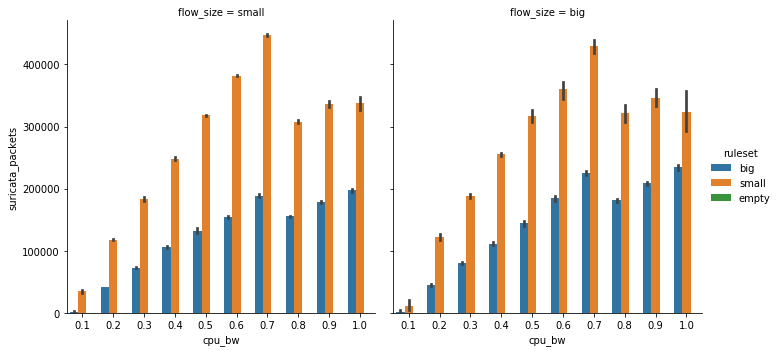

In [4]:
sns.catplot(data=df, x="cpu_bw", y="suricata_packets", hue="ruleset", col="flow_size", kind="bar")

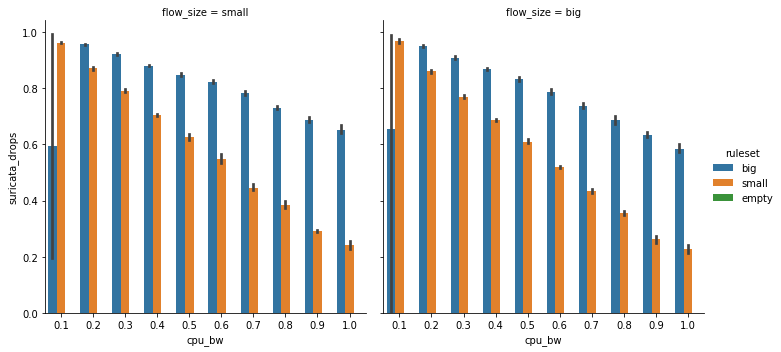

In [5]:
sns.catplot(data=df, x="cpu_bw", y="suricata_drops", hue="ruleset", col="flow_size", kind="bar")

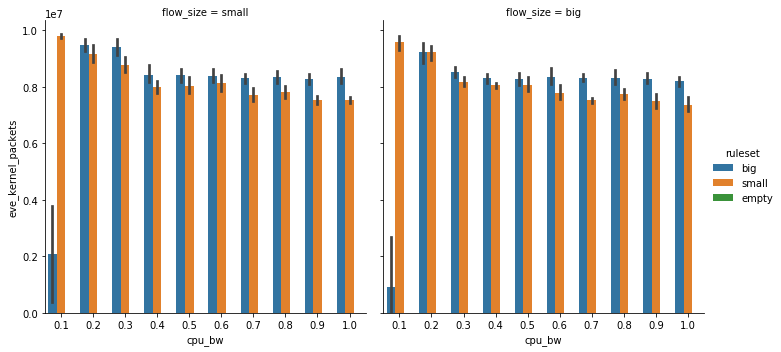

In [6]:
sns.catplot(data=df, x="cpu_bw", y="eve_kernel_packets", hue="ruleset", col="flow_size", kind="bar")

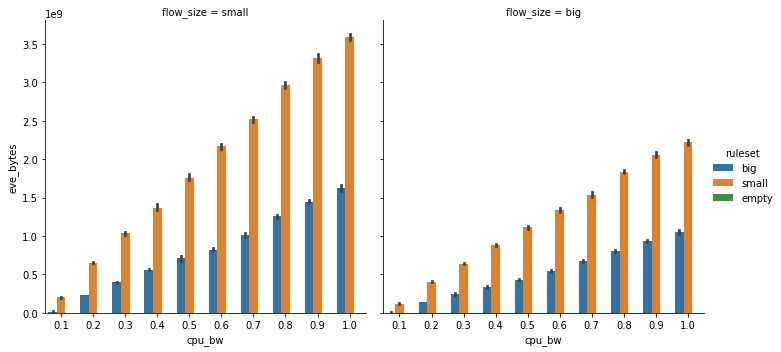

In [7]:
sns.catplot(data=df, x="cpu_bw", y="eve_bytes", hue="ruleset", col="flow_size", kind="bar")

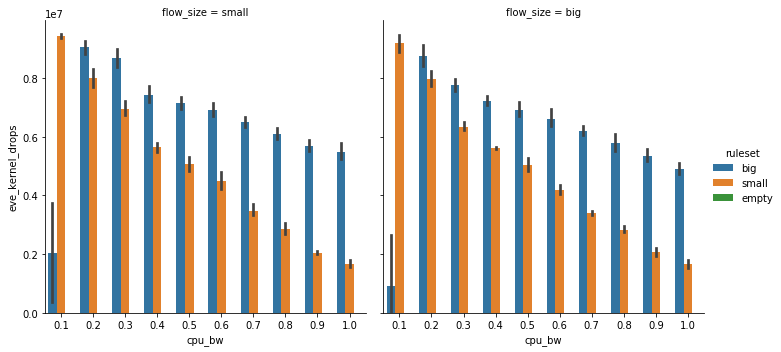

In [8]:
sns.catplot(data=df, x="cpu_bw", y="eve_kernel_drops", hue="ruleset", col="flow_size", kind="bar")

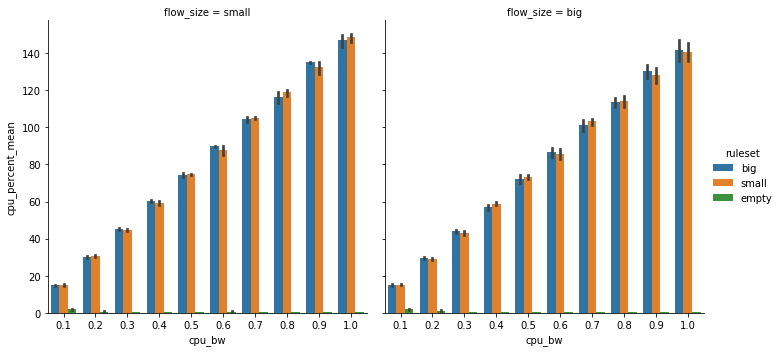

In [9]:
sns.catplot(data=df, x="cpu_bw", y="cpu_percent_mean", hue="ruleset", col="flow_size", kind="bar")

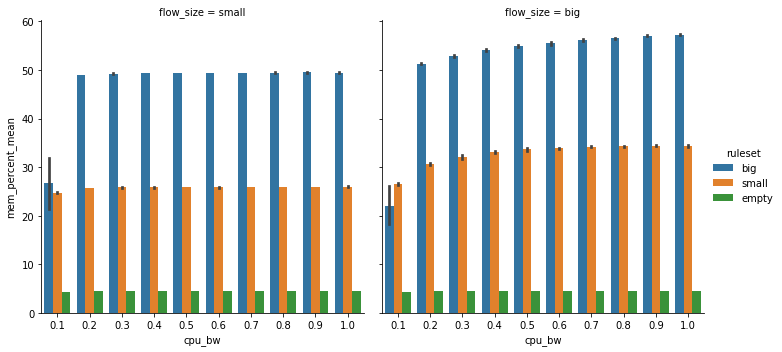

In [10]:
sns.catplot(data=df, x="cpu_bw", y="mem_percent_mean", hue="ruleset", col="flow_size", kind="bar")